In [1]:
# Step 1: Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Step 2: Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values   # Annual income, Spwnding score (1-100)

<IPython.core.display.Javascript object>


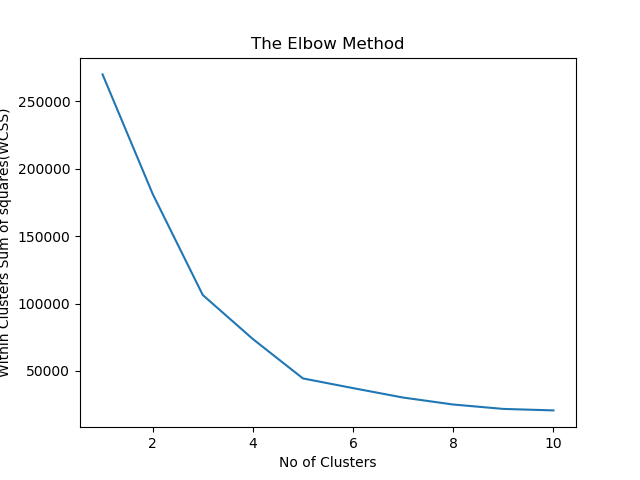

In [8]:
# Step 3: Find Optimal no. of cluster using elbow method

%matplotlib notebook
## Elbow Method: Where points look fimiliar to elbow, that's optimal point to selsect k no. of clusters
from sklearn.cluster import KMeans
wcss = list()
for i in range(1, 11): # Taking 10 times wcss
    kmeans = KMeans(n_clusters=i,       # To generate no. of clusters & centroids
                    init='k-means++',   # To select init. Centroids in efficient way tp speed up convergence
                    max_iter=300,       # Max. no. of iteration to run for single run
                    random_state=0,     # for smae result 
                    n_init=10)          # No. of times the algo. wil be run with diff. centroid seeds.
                                        #          Result would be better consecutive runs in terms of inertia.
    
    kmeans.fit(X)   # best fit the our X
    wcss.append(kmeans.inertia_)    # obj.inertia_ -> To compute Within Clusters Sum of squares(wcss) also called inertia
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method") 
plt.xlabel("No of Clusters")
plt.ylabel("Within Clusters Sum of squares(WCSS)")
plt.show()

In [9]:
# Step 5: Apply KMeans technique to our data set
## From Elbow Method; Optimal clusters are 5
kmeans = KMeans(n_clusters=5,       # To generate no. of clusters & centroids
                init='k-means++',   # To select init. Centroids in efficient way tp speed up convergence
                max_iter=300,       # Max. no. of iteration to run for single run
                random_state=0,     # for smae result 
                n_init=10)          # No. of times the algo. wil be run with diff. centroid seeds.
                                    #          Result would be better consecutive runs in terms of inertia.

y_kmeans = kmeans.fit_predict(X)  # object.fit_predict -> Returns for each obs. which cluster it belongs to
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

<IPython.core.display.Javascript object>


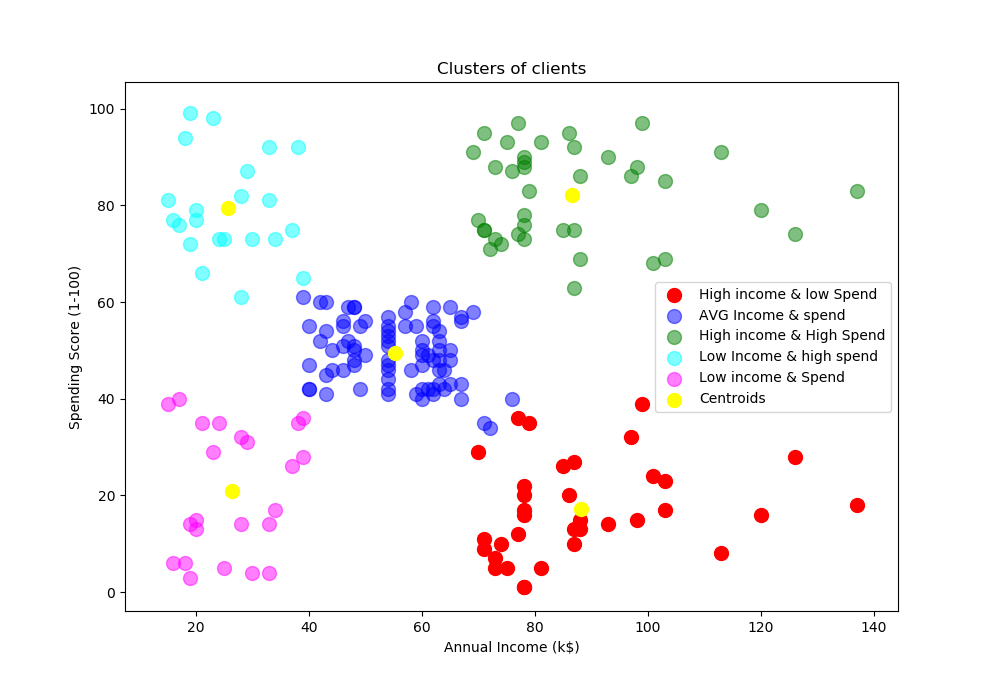

In [27]:
# Step 6: Visualizing the clusters
plt.scatter(X[y_kmeans==0, 0],  # y_kmeans==0 > All values in array == 0, col=0(Annual Income)
            X[y_kmeans==0, 1],  # y_kmeans==0 > All values in array == 0, col=1(Spending score (1-100))
            s=100,  # Size for each data spot for scatter 
            c='red', # Color of each data spot for scatter
            label='High income & low Spend') # Text for thisspecific data spot
plt.scatter(X[y_kmeans==1, 0] , X[y_kmeans==1, 1], s=100, c='blue', alpha=0.5,label='AVG Income & spend')
plt.scatter(X[y_kmeans==2, 0] , X[y_kmeans==2, 1], s=100, c='green', alpha=0.5,label='High income & High Spend')
plt.scatter(X[y_kmeans==3, 0] , X[y_kmeans==3, 1], s=100, c='cyan', alpha=0.5,label='Low Income & high spend')
plt.scatter(X[y_kmeans==4, 0] , X[y_kmeans==4, 1], s=100, c='magenta', alpha=0.5,label='Low income & Spend')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label="Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()